 Importing Required Libraries


In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

from sklearn.feature_selection import f_classif ,chi2
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

read data


In [5]:
Data_path=os.path.join(os.getcwd(), '..','dataset','Churn_Modelling.csv')

In [8]:
df = pd.read_csv(Data_path)

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:

df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
#adj columns name
df.columns = df.columns.str.strip().str.replace(' ','_')

In [58]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9988 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9988 non-null   int64  
 1   Geography        9988 non-null   object 
 2   Gender           9988 non-null   object 
 3   Age              9988 non-null   int64  
 4   Tenure           9988 non-null   int64  
 5   Balance          9988 non-null   float64
 6   NumOfProducts    9988 non-null   int64  
 7   HasCrCard        9988 non-null   int64  
 8   IsActiveMember   9988 non-null   int64  
 9   EstimatedSalary  9988 non-null   float64
 10  Exited           9988 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 936.4+ KB


In [60]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,650.491990,38.867040,5.012215,76510.392653,1.530136,0.705547,0.514618,100082.673377,0.203845
std,96.602495,10.373468,2.891906,62399.394235,0.581750,0.455819,0.499811,57505.152617,0.402875
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97245.995000,1.000000,1.000000,1.000000,100218.210000,0.000000
75%,717.250000,44.000000,7.000000,127660.767500,2.000000,1.000000,1.000000,149382.097500,0.000000
max,850.000000,80.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


EDA

In [61]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [62]:
df['Geography'].value_counts()

Geography
France     5006
Germany    2506
Spain      2476
Name: count, dtype: int64

In [63]:
df['Gender'].value_counts()

Gender
Male      5450
Female    4538
Name: count, dtype: int64

In [64]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.796155
1    0.203845
Name: proportion, dtype: float64

In [65]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [66]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

DATA viz

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

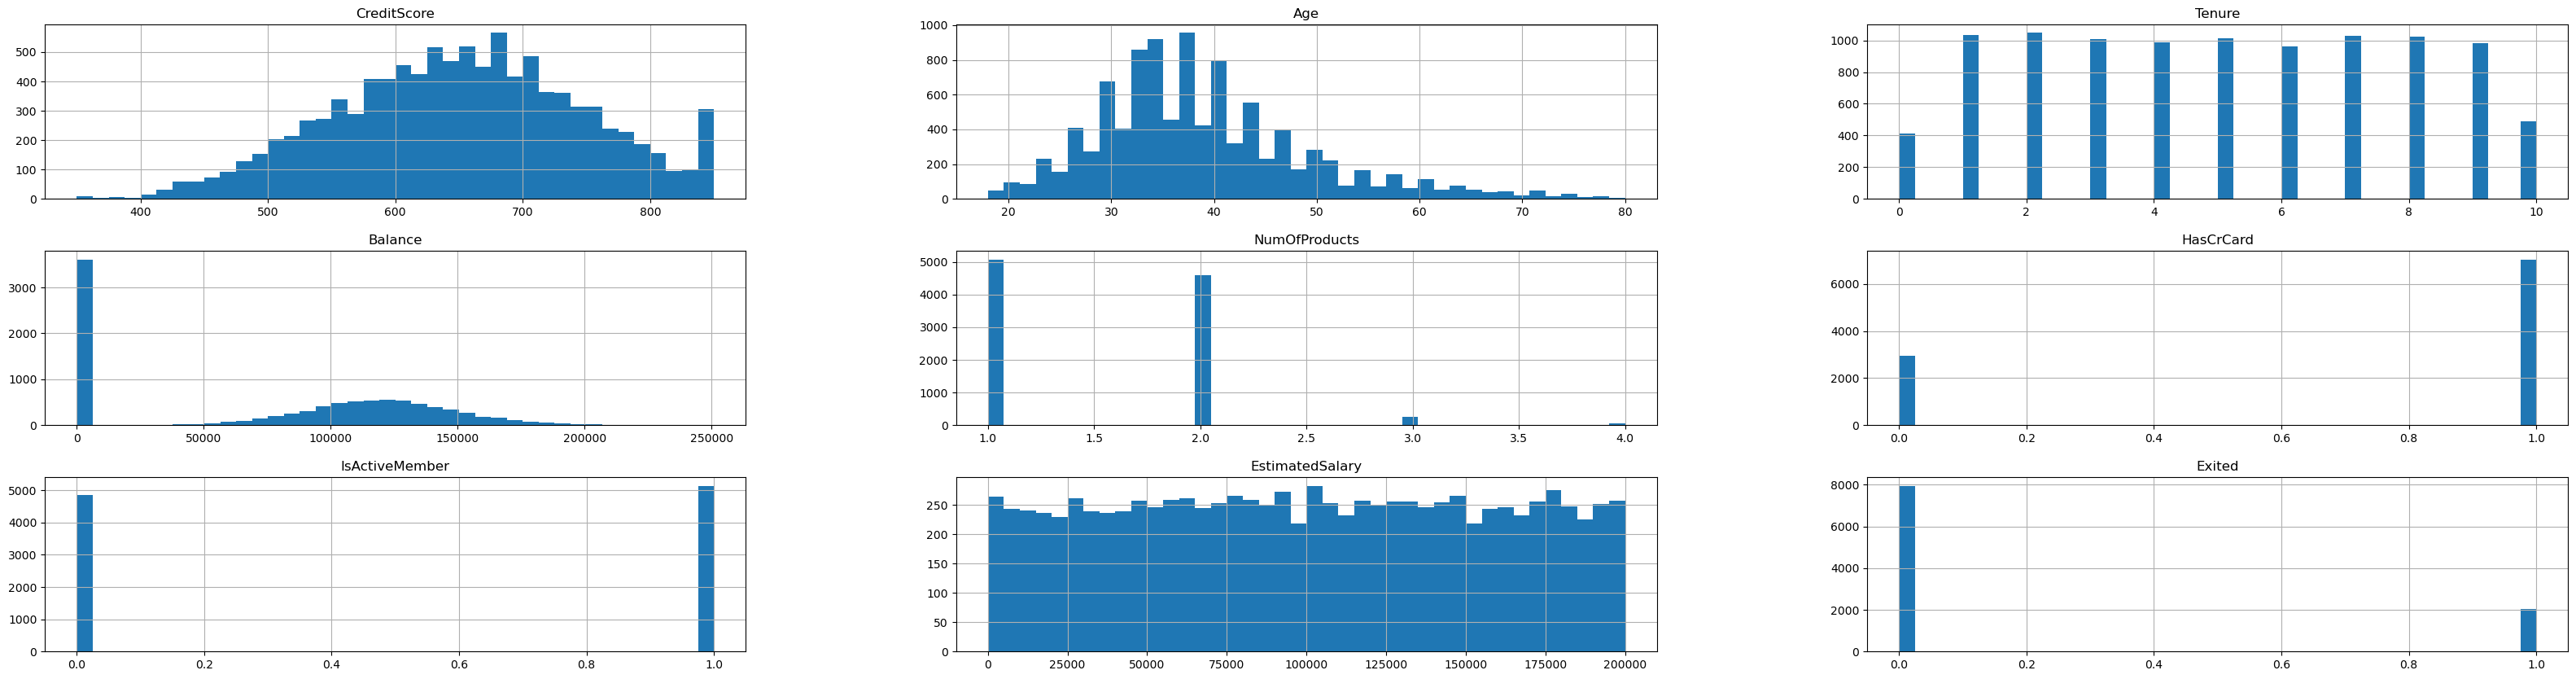

In [67]:

df.hist(bins=40 , figsize=(40,10))

In [68]:
from sklearn.preprocessing import power_transform

In [69]:
df[df['Age']>80]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


<Axes: xlabel='Age'>

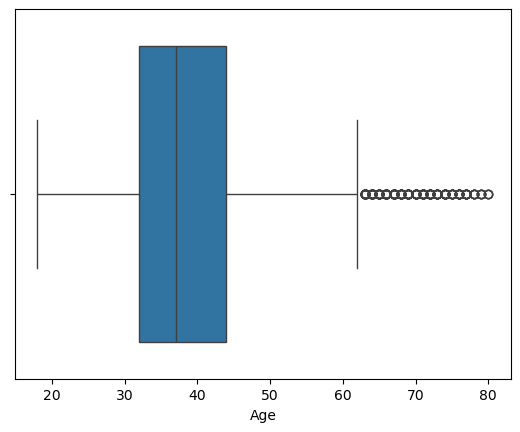

In [70]:
sns.boxplot(data=df, x=df['Age'])

In [71]:
df.drop(index=df[df['Age']>80].index.tolist(),axis=0,inplace=True)

<Axes: xlabel='Geography', ylabel='count'>

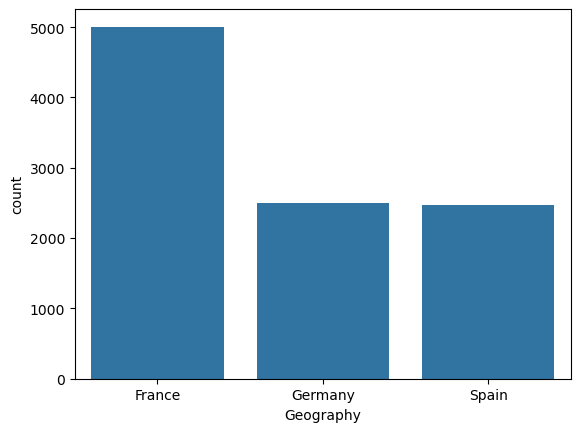

In [72]:
sns.countplot(data=df, x='Geography',order=df['Geography'].value_counts().index.tolist())

<Axes: xlabel='Gender', ylabel='count'>

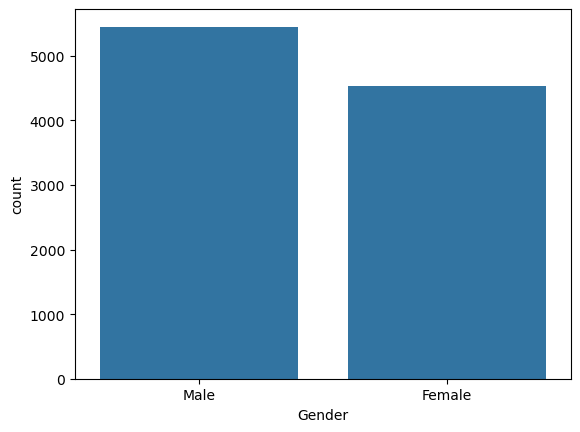

In [73]:
sns.countplot(data=df, x='Gender',order=df['Gender'].value_counts().index.tolist())

<Axes: ylabel='EstimatedSalary'>

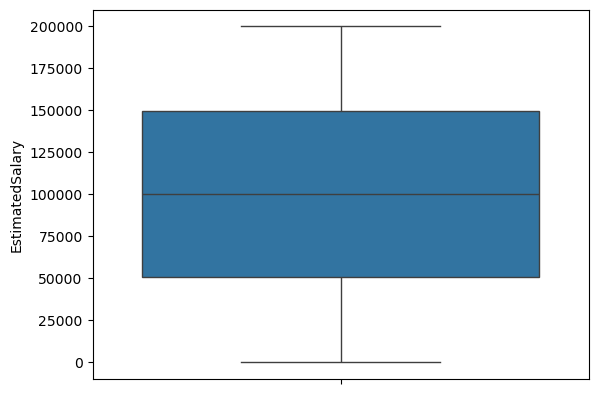

In [74]:
sns.boxplot(data=df , y='EstimatedSalary')

In [75]:
df[['Gender', 'EstimatedSalary']].groupby('Gender')['EstimatedSalary'].mean()

Gender
Female    100575.998277
Male       99671.901194
Name: EstimatedSalary, dtype: float64

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

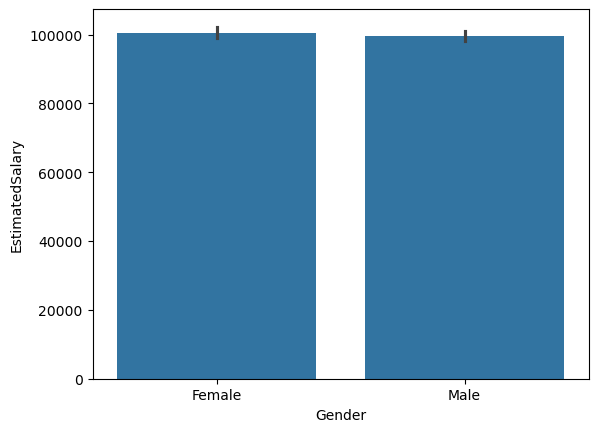

In [76]:
sns.barplot(data=df ,y='EstimatedSalary', x='Gender',estimator='mean')

<Axes: xlabel='Tenure', ylabel='count'>

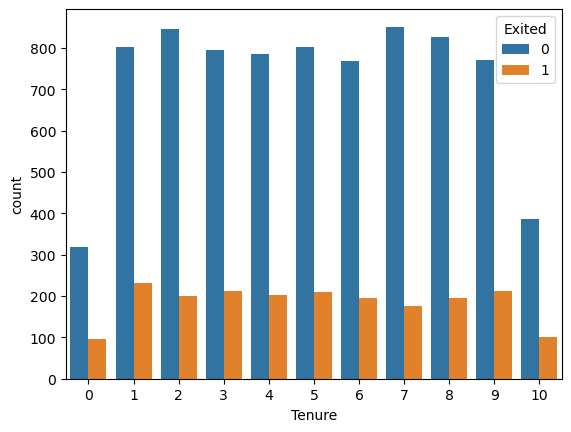

In [77]:
sns.countplot(data=df, x='Tenure', hue='Exited')

<Axes: xlabel='Geography', ylabel='count'>

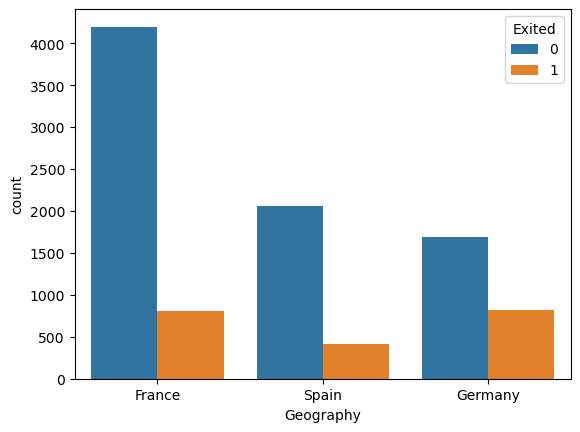

In [78]:
sns.countplot(data=df, x='Geography',hue='Exited')

In [113]:
#split to train and test

x=df.drop(columns='Exited')
y=df['Exited']

#train and test
x_train,x_test,y_train,y_test =train_test_split(x,y,train_size=.7,shuffle=True,random_state=45)
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print("//////////////")
print('y_train',y_train.shape)
print('y_test',y_test.shape)



x_train (6991, 10)
x_test (2997, 10)
//////////////
y_train (6991,)
y_test (2997,)


In [114]:
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7386,666,Germany,Female,37,2,158468.76,1,0,1,93266.01
3007,602,France,Male,33,5,164704.38,1,0,1,180716.10
6011,520,Germany,Female,45,1,123086.39,1,1,1,41042.40
5492,712,France,Male,35,7,124616.23,1,1,1,69320.97
1787,669,France,Male,25,1,157848.53,1,0,0,37543.93
...,...,...,...,...,...,...,...,...,...,...
8782,600,Spain,Female,27,6,0.00,2,1,1,172031.22
163,721,Spain,Female,36,2,0.00,2,1,1,106977.80
6018,731,France,Male,30,7,0.00,2,0,1,143086.09
6565,663,France,Female,33,2,0.00,2,1,0,153295.00


In [115]:
num_col=['Age','EstimatedSalary','Balance','CreditScore']
catge_col=['Geography','Gender']
ready_col=list(set(x_train.columns.tolist()) -set(num_col)-set(catge_col))

In [116]:
ready_col

['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Tenure']

In [117]:
_,p_val=f_classif(X=x_train[num_col],y=y_train)

In [118]:
p_val

array([3.92178060e-143, 9.10837338e-002, 8.13355675e-020, 9.86927885e-003])

In [119]:
_,p_val= chi2(X=OneHotEncoder().fit_transform(x_train[catge_col]),y=y_train)
p_val

array([1.51613993e-10, 1.50084355e-36, 1.59024513e-04, 8.22581214e-11,
       2.15318903e-09])

In [120]:
_,p_val = chi2(X=x_train[ready_col],y=y_train)
p_val

array([3.76345957e-02, 5.34376026e-01, 8.30902815e-19, 4.67076167e-02])

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [150]:
num_pipline=Pipeline(
    [
        ('imputer' , SimpleImputer(strategy= 'median')),
        ('scaler',StandardScaler())


    ]
)

catge_pipline=Pipeline(
    [
        ('imputer' , SimpleImputer(strategy= 'most_frequent')),
        ('one',OneHotEncoder(sparse_output=False))


    ])

ready_pipline=Pipeline(
    [
        ('imputer' , SimpleImputer(strategy= 'most_frequent')),


    ])

preprocessor = ColumnTransformer(transformers=[
    ('numarical', num_pipline, num_col),
    ('categ', catge_pipline,catge_col),
    ('ready', ready_pipline, ready_col)





])
x_trainfinal = preprocessor.fit_transform(x_train)
x_testfinal = preprocessor.transform(x_test)



deal with imblanced

In [141]:
vals_count= 1-np.bincount(y_train)/len(y_train)
dic_w={}
for i in range(2):
    dic_w[i] = vals_count[i]
dic_w

{0: 0.20826777285080822, 1: 0.7917322271491918}

In [144]:
model_path=os.path.join(os.getcwd(), '..','models')
os.makedirs(model_path,exist_ok=True)

In [145]:
joblib.dump(preprocessor,os.path.join(model_path,'processor.pkl'))

['e:\\churn\\notebook\\..\\models\\processor.pkl']

model

In [152]:
log_clf = LogisticRegression(C=1.5)
log_clf.fit(x_trainfinal, y_train)

y_pred_train=log_clf.predict(x_trainfinal)

y_pred_test=log_clf.predict(x_testfinal)


In [163]:
print('score', f1_score(y_test,y_pred_test))

score 0.30749682337992373


In [164]:
print(f'F1 Score: {f1_score(y_train, y_pred_train)}')


F1 Score: 0.3259779338014042


In [166]:
log_clf = LogisticRegression(class_weight=dic_w,C=1.5)
log_clf.fit(x_trainfinal, y_train)

y_pred_train=log_clf.predict(x_trainfinal)

y_pred_test=log_clf.predict(x_testfinal)
print('score', f1_score(y_test,y_pred_test))
print(f'F1 Score: {f1_score(y_train, y_pred_train)}')


score 0.4690909090909091
F1 Score: 0.5071125530321937


In [167]:
confusion_matrix(y_true=y_test ,y_pred=y_pred_test)

array([[1734,  683],
       [ 193,  387]], dtype=int64)

<Axes: >

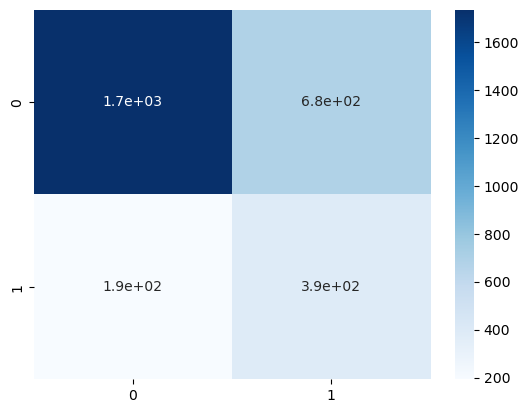

In [175]:
sns.heatmap(confusion_matrix(y_true=y_test ,y_pred=y_pred_test), annot=True, cmap='Blues')

In [184]:
for_clf= RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42,class_weight=dic_w)
for_clf.fit(x_trainfinal, y_train)


RandomForestClassifier(class_weight={0: 0.20826777285080822,
                                     1: 0.7917322271491918},
                       max_depth=5, random_state=42)

In [ ]:
y_pred_train_ran=for_clf.predict(x_trainfinal)

y_pred_test_ran=for_clf.predict(x_testfinal)
print('Train F1 Score:', f1_score(y_train, y_pred_train_ran))  
print('Test F1 Score:', f1_score(y_test, y_pred_test_ran))    



Train F1 Score: 0.6199599656848728
Test F1 Score: 0.5843164469118668


In [191]:
firist= for_clf= RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42,class_weight=dic_w)

best_grad={
    'n_estimators' : np.arange(40,400,40),
    'max_depth':np.arange(2,10,2)


}

graid=GridSearchCV(estimator=firist,param_grid=best_grad,cv=5,verbose=2,scoring='f1')

In [192]:
graid.fit(x_trainfinal,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .......................max_depth=2, n_estimators=40; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=40; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=40; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=40; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=40; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=80; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=80; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=80; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=80; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=80; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=120; total time=   0.2s
[CV] END ......................max_depth=2, n_e

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.20826777285080822,
                                                            1: 0.7917322271491918},
                                              max_depth=5, random_state=42),
             param_grid={'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': array([ 40,  80, 120, 160, 200, 240, 280, 320, 360])},
             scoring='f1', verbose=2)

In [193]:
graid.best_score_, graid.best_params_

(0.6198266015544347, {'max_depth': 8, 'n_estimators': 80})

In [194]:
forest_tuin=graid.best_estimator_
forest_tuin

RandomForestClassifier(class_weight={0: 0.20826777285080822,
                                     1: 0.7917322271491918},
                       max_depth=8, n_estimators=80, random_state=42)

In [195]:
y_pred_train_ran=forest_tuin.predict(x_trainfinal)

y_pred_test_ran=forest_tuin.predict(x_testfinal)
print('Train F1 Score:', f1_score(y_train, y_pred_train_ran))  
print('Test F1 Score:', f1_score(y_test, y_pred_test_ran))    



Train F1 Score: 0.7080135093644458
Test F1 Score: 0.6093630084420568


In [196]:
joblib.dump(forest_tuin,os.path.join(model_path,'forest_tuin.pkl'))

['e:\\churn\\notebook\\..\\models\\forest_tuin.pkl']